In [1]:
import redback
from redback.simulate_transients import SimulateGenericTransient
from astropy.cosmology import Planck18 as cosmo
%pylab inline

20:15 bilby INFO    : Running bilby version: 2.3.1.dev100+g65bcde32
20:15 redback INFO    : Running redback version: 1.0.31


%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


20:15 redback WARNING : [Errno 2] No such file or directory: 'kilonova//my_kilonova_metadata.csv'
20:15 redback WARNING : Setting metadata to None. This is not an error, but a warning that no metadata could be found online.


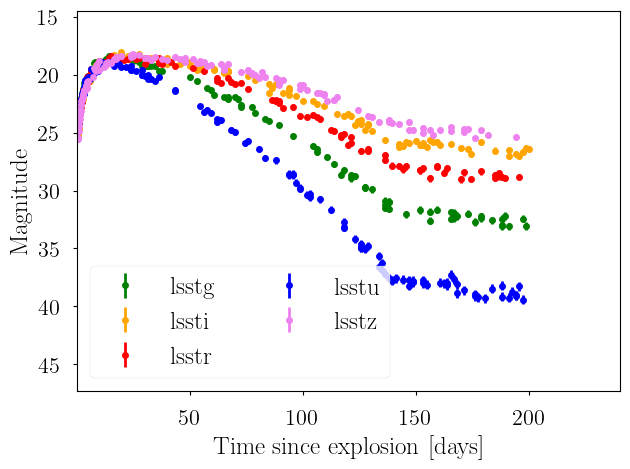

<Axes: xlabel='Time since explosion [days]', ylabel='Magnitude'>

In [2]:
np.random.seed(1236)

bands = ['lsstg', 'lsstr', 'lssti', 'lsstu', 'lsstz']

# let's also add some sensible colours to the plot
band_colors = {'lsstg':'green', 'lsstr':'red',
                'lssti':'orange', 'lsstu':'blue', 'lsstz':'violet'}

times = np.geomspace(0.5, 50, 100)
times = np.append(times, np.linspace(50, 200, 100))
kappa = 0.07
kappa_gamma = 0.1
mej = 4
vej = 20000
nickel_mass = 1.5
tf = 1600
f_nickel = nickel_mass/mej
output_format = 'magnitude'
model_kwargs = {'output_format':output_format, 'bands':bands}
num_of_data_points = 650 # the number of data points to generate
parameters = {}
parameters['kappa'] = kappa
parameters['kappa_gamma'] = kappa_gamma
parameters['f_nickel'] = f_nickel
parameters['mej'] = mej
parameters['vej'] = vej
parameters['temperature_floor'] = tf
parameters['redshift'] = 0.1
distance = cosmo.luminosity_distance(parameters['redshift']).cgs.value

func = redback.model_library.all_models_dict['arnett_bolometric']
lbol_a = func(times, f_nickel=f_nickel, mej=mej, vej=vej, kappa=kappa,
                         kappa_gamma=kappa_gamma, temperature_floor=tf)

kn_obs = SimulateGenericTransient(model='arnett', parameters=parameters, times=times,
                                  data_points=num_of_data_points, model_kwargs=model_kwargs,
                                 multiwavelength_transient=True, noise_term=0.01)

transient = redback.transient.Kilonova(name='my_kilonova',
                                       magnitude=kn_obs.data['output'].values,
                                      time=kn_obs.data['time'].values,
                                       data_mode=output_format,
                                      magnitude_err=kn_obs.data['output_error'].values,
                                      bands=kn_obs.data['band'].values,
                                       redshift=parameters['redshift'])
transient.plot_data(band_colors=band_colors)


In [3]:
df = transient.estimate_bolometric_luminosity_bb(distance, 
                                                 lambda_cut=1, 
                                                 min_filters=5, 
                                                A_ext=0.)

20:15 redback INFO    : Including effects of missing flux due to line blanketing.
20:15 redback INFO    : Using lambda_cut = 1 Å for bolometric luminosity boost.
20:15 redback INFO    : Estimating blackbody parameters for my_kilonova.
20:15 redback INFO    : Using data mode = magnitude
20:15 redback INFO    : Number of bins: 201
20:15 redback INFO    : Masking epochs with likely wrong extractions
20:15 redback INFO    : Masking bolometric estimates with likely wrong extractions
20:15 redback INFO    : Estimated bolometric luminosity using blackbody integration (with boost and extinction corrections if specified).


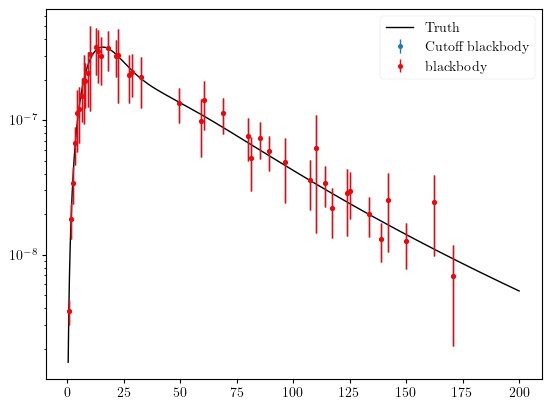

In [4]:
plt.plot(times, lbol_a/1e50, c='black', label='Truth')
plt.errorbar(df['time_rest_frame'], df['lum_bol'], df['lum_bol_err'], 
             fmt='o', label='Cutoff blackbody')

plt.errorbar(df['time_rest_frame'], df['lum_bol_bb'], df['lum_bol_bb_err'], 
             fmt='o', color='red', label='blackbody')
plt.yscale('log')

plt.legend()

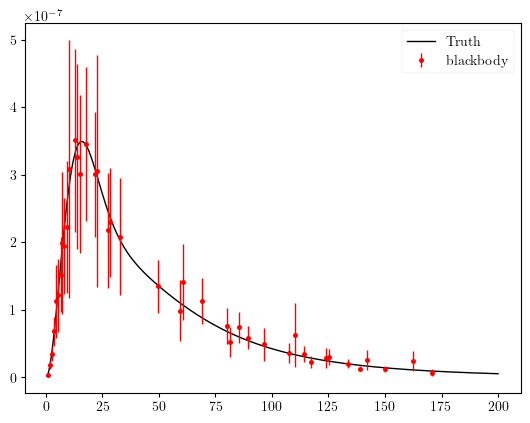

In [5]:
plt.plot(times, lbol_a/1e50, c='black', label='Truth')
# plt.errorbar(df['time_rest_frame'], df['lum_bol'], df['lum_bol_err'], 
#              fmt='o', label='Cutoff blackbody')

plt.errorbar(df['time_rest_frame'], df['lum_bol_bb'], df['lum_bol_bb_err'], 
             fmt='o', color='red', label='blackbody')
# plt.yscale('log')

plt.legend()

In [6]:
df['lum_bol'] - df['lum_bol_err']

0     2.982202e-09
1     1.295653e-08
2     2.375129e-08
3     4.659012e-08
4     5.760604e-08
5     6.727848e-08
6     9.681739e-08
7     9.328855e-08
8     1.238321e-07
9     1.244538e-07
10    1.176640e-07
11    2.152387e-07
12    1.893826e-07
13    1.835459e-07
14    2.318574e-07
15    2.083551e-07
16    1.338502e-07
17    1.329136e-07
18    1.489061e-07
19    1.224426e-07
21    9.545098e-08
22    5.322990e-08
23    8.422741e-08
24    7.851529e-08
25    4.923749e-08
26    2.952304e-08
27    5.096493e-08
28    4.160393e-08
29    2.407751e-08
30    2.127254e-08
31    1.457602e-08
32    2.265829e-08
33    1.337244e-08
34    1.373330e-08
35    1.845261e-08
36    1.353090e-08
37    8.874233e-09
38    1.039614e-08
39    7.861696e-09
40    9.796264e-09
41    2.097804e-09
dtype: float64